CREDIT RISK MODEL

Dataset: [https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv](https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?select=lc_2016_2017.csv)

# Introduction
Credit Risk Model adalah sebuah model untuk memprediksi pinjaman mana yang akan gagal bayar.
Masuknya ke klasifikasi,dgn kasus klasifikasi biner. dimana Target: 
- 1 = bad loan / gagal bayar
- 0 = good loan / pembayaran tepat waktu

lebih fokus utk mengetahui client mana yang memiliki probabilitas tinggi utk mengalami kegagalan bayar.

# Import libaries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# melihat isi data yg ada dalam 1 folder ini
os.listdir()

['.ipynb_checkpoints', 'credit-risk.ipynb', 'lc_2016_2017.csv']

In [4]:
loan_data = pd.read_csv('lc_2016_2017.csv')
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  112435993        NaN       2300         2300           2300.0  36 months   
1  112290210        NaN      16000        16000          16000.0  60 months   
2  112436985        NaN       6025         6025           6025.0  36 months   
3  112439006        NaN      20400        20400          20400.0  36 months   
4  112438929        NaN      13000        13000          13000.0  36 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     12.62        77.08     C        C1  ...          0.0     NaN   
1     12.62       360.95     C        C1  ...      11078.0    69.0   
2     15.05       209.01     C        C4  ...          0.0     NaN   
3      9.44       652.91     B        B1  ...      53566.0    95.0   
4     11.99       431.73     B        B5  ...       8466.0    72.0   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         1.0          2.0     2315.0     55.0           7100.0    1.0   
1         3.0          5.0     1962.0     94.0          31900.0    0.0   
2         1.0          2.0     1950.0     45.0          27700.0    1.0   
3         1.0          2.0     4240.0     60.0          46900.0    1.0   
4         0.0          1.0     2996.0     78.0           7800.0    0.0   

  total_cu_tl inq_last_12m  
0         0.0          2.0  
1         6.0          1.0  
2         5.0          3.0  
3         1.0          1.0  
4         0.0          0.0  

[5 rows x 72 columns]

In [5]:
# cek jumlah dari row
loan_data.shape

(759338, 72)

In [6]:
# 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [7]:
loan_data.loan_status

0                   Current
1                   Current
2                   Current
3                   Current
4                   Current
                ...        
759333              Current
759334              Current
759335    Late (16-30 days)
759336              Current
759337              Current
Name: loan_status, Length: 759338, dtype: object

In [8]:
# 
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [9]:
# mendefinisikan kolom target variabel
# mendefinisikan 'Late (31-120 days)','Late (16-30 days)', 'Charged Off', 'Default' sebagai 0
# mendefinisikan 'Current', 'Fully Paid', 'In Grace Period' sebagai 1

loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default',
                                                                       'Late (16-30 days)','Late (31-120 days)'])
                                 ,1,0)

In [10]:
loan_data.good_bad

0         0
1         0
2         0
3         0
4         0
         ..
759333    0
759334    0
759335    1
759336    0
759337    0
Name: good_bad, Length: 759338, dtype: int32

In [11]:
loan_data.good_bad.value_counts()

0    702875
1     56463
Name: good_bad, dtype: int64

In [12]:
loan_data[['loan_status', 'good_bad']]

loan_status  good_bad
0                 Current         0
1                 Current         0
2                 Current         0
3                 Current         0
4                 Current         0
...                   ...       ...
759333            Current         0
759334            Current         0
759335  Late (16-30 days)         1
759336            Current         0
759337            Current         0

[759338 rows x 2 columns]

# Pengecekan missing values

In [13]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])

In [14]:
# jumlah presentase missing_values pada tiap kolomnya,
# lalu difilter yang lebih dari 50%
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]

In [15]:
# diurut dari yang terbesar
missing_values.sort_values([0], ascending=False)

0
member_id                    1.000000
desc                         0.999978
dti_joint                    0.955223
annual_inc_joint             0.955220
verification_status_joint    0.955220
mths_since_last_record       0.814076
mths_since_last_major_derog  0.716720

In [16]:
loan_data.dropna(thresh=loan_data.shape[0]*0.5, how='all', axis=1, inplace=True)

In [17]:
# pengecekan ulang, sudah berhasil di remove atau belom
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

Empty DataFrame
Columns: [0]
Index: []

# Data Splitting
Train set dan Test set -> membagi dataset menjadi 2, bertujuan utk mengukur kemampuan ML dalam memprediksi suatu datapoint baru, apakah dpt mmprediksi tpeat/akurat

In [18]:
loan_data.shape

(759338, 66)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# membagi dataset menajdi 80% data train dan 20% data test
X = loan_data.drop('good_bad', axis=1) #variabel prediktor
y = loan_data['good_bad'] #target variabel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
# fungsi stratify digunakan agar y tain dan y test memiliki distribusi yg sama
# karena ketika tidak ada distribusi yang sama, maka akan mempengaruhi ML model
# random state digunakan agar random/row nya itu terus

In [21]:
X_train.shape, X_test.shape

((607470, 65), (151868, 65))

In [22]:
y_train.value_counts(normalize=True) # isi dari y train

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [23]:
y_test.value_counts(normalize=True) #kasus imbalance dataset
# dimana kelas 1 nya sedikit sekali, bahkan kurang dari 1%, utk menanganinya harus memiliki distribusi yang sama

0    0.925639
1    0.074361
Name: good_bad, dtype: float64

# Data Cleaning

In [24]:
X_train.shape

(607470, 65)

In [25]:
# melakukan filter , hanya memilih kolom yg kategori/obj/boolean/non-numerik
X_train.select_dtypes(include=['object','boolean'])

term grade sub_grade                          emp_title  \
147577  36 months     C        C1           Administrative assistant   
505776  36 months     A        A1  director of workforce development   
412425  36 months     B        B1                              Nanny   
618730  36 months     B        B5                QA Software Analyst   
111143  36 months     C        C1                         Supervisor   
...           ...   ...       ...                                ...   
150426  36 months     A        A4        Construction Superintendent   
195135  36 months     B        B2                                NaN   
182511  36 months     A        A3                   Aquatics Manager   
82596   36 months     C        C3               making plant planner   
165904  36 months     B        B1                      Sales Manager   

       emp_length home_ownership verification_status   issue_d loan_status  \
147577    4 years       MORTGAGE     Source Verified  Feb-2017     Current   
505776  10+ years           RENT     Source Verified  Apr-2016  Fully Paid   
412425   < 1 year           RENT        Not Verified  Jul-2017     Current   
618730    5 years           RENT     Source Verified  Oct-2016     Current   
111143    6 years           RENT     Source Verified  Mar-2017     Current   
...           ...            ...                 ...       ...         ...   
150426    8 years       MORTGAGE     Source Verified  Feb-2017  Fully Paid   
195135        NaN           RENT            Verified  Jan-2017     Current   
182511  10+ years       MORTGAGE        Not Verified  Jan-2017     Current   
82596     3 years       MORTGAGE            Verified  Apr-2017     Current   
165904     1 year       MORTGAGE     Source Verified  Feb-2017     Current   

       pymnt_plan             purpose                    title zip_code  \
147577          n  debt_consolidation       Debt consolidation    582xx   
505776          n  debt_consolidation       Debt consolidation    112xx   
412425          n         credit_card  Credit card refinancing    112xx   
618730          n         credit_card  Credit card refinancing    840xx   
111143          n  debt_consolidation       Debt consolidation    334xx   
...           ...                 ...                      ...      ...   
150426          n               other                    Other    913xx   
195135          n    home_improvement         Home improvement    320xx   
182511          n    home_improvement         Home improvement    988xx   
82596           n  debt_consolidation       Debt consolidation    121xx   
165904          n  debt_consolidation       Debt consolidation    210xx   

       addr_state earliest_cr_line initial_list_status last_pymnt_d  \
147577         ND         Aug-1994                   w     Dec-2017   
505776         NY         Sep-2001                   w     Jul-2017   
412425         NY         May-1999                   w     Dec-2017   
618730         UT         Jun-2005                   w     Dec-2017   
111143         FL         Jan-2012                   w     Dec-2017   
...           ...              ...                 ...          ...   
150426         CA         Nov-1998                   w     Nov-2017   
195135         FL         Sep-1993                   f     Dec-2017   
182511         WA         Mar-1988                   w     Dec-2017   
82596          NY         Jan-2003                   w     Dec-2017   
165904         MD         Nov-2000                   w     Dec-2017   

       next_pymnt_d last_credit_pull_d application_type  
147577     Jan-2018           Dec-2017       Individual  
505776          NaN           Nov-2017       Individual  
412425     Jan-2018           Dec-2017       Individual  
618730     Jan-2018           Dec-2017       Individual  
111143     Jan-2018           Dec-2017       Individual  
...             ...                ...              ...  
150426          NaN           Dec-2017       Indivi

approachnya bisa dibagi menajdi
1. fokus pd var. objek/kategorik lalu dibersihkan datanya
2. membersihkan kolom yang numerik

In [26]:
for col in X_train.select_dtypes(include=['object','boolean']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

['w' 'f']

last_pymnt_d
['Dec-2017' 'Jul-2017' 'Nov-2017' 'Jun-2017' 'Sep-2017' 'Oct-2016'
 'Sep-2016' 'Aug-2017' 'May-2017' 'Oct-2017' 'Mar-2017' 'Jan-2017' nan
 'Apr-2017' 'Aug-2016' 'Mar-2016' 'May-2016' 'Apr-2016' 'Jul-2016'
 'Nov-2016' 'Feb-2016' 'Dec-2016' 'Feb-2017' 'Jun-2016' 'Jan-2016']

next_pymnt_d
['Jan-2018' nan 'Dec-2017' 'Feb-2018']

last_credit_pull_d
['Dec-2017' 'Nov-2017' 'Jul-2017' 'Oct-2017' 'Jun-2017' 'Oct-2016'
 'Mar-2017' 'Sep-2017' 'Aug-2017' 'May-2017' 'Feb-2017' 'Mar-2016'
 'Apr-2017' 'Nov-2016' 'Apr-2016' 'Aug-2016' 'Dec-2016' 'Jul-2016'
 'Jan-2017' 'Jun-2016' 'Feb-2016' 'Sep-2016' 'Jan-2016' 'May-2016'
 'Dec-2015' nan]

application_type
['Individual' 'Joint App']



In [27]:
# tentukan kolom yang ingin dibersihkan
col_need_to_clean = ['term','emp_length','issue_d','earliest_cr_line','last_pymnt_d',
                     'next_pymnt_d','last_credit_pull_d']

In [28]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [29]:
# mengubah month menjadi kosong dan mengganti tipe data objek ke numerik
pd.to_numeric(X_train['term'].str.replace(' months', ''))

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [30]:
# assign kedalam kolom
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [31]:
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [32]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')
X_train['emp_length'].fillna(value = 0, inplace= True)

X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])
X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [33]:
# mmnegubah kolom tipe data tanggal
col_date = ['issue_d','earliest_cr_line','last_pymnt_d',
                     'next_pymnt_d','last_credit_pull_d']
X_train[col_date]

issue_d earliest_cr_line last_pymnt_d next_pymnt_d last_credit_pull_d
147577  Feb-2017         Aug-1994     Dec-2017     Jan-2018           Dec-2017
505776  Apr-2016         Sep-2001     Jul-2017          NaN           Nov-2017
412425  Jul-2017         May-1999     Dec-2017     Jan-2018           Dec-2017
618730  Oct-2016         Jun-2005     Dec-2017     Jan-2018           Dec-2017
111143  Mar-2017         Jan-2012     Dec-2017     Jan-2018           Dec-2017
...          ...              ...          ...          ...                ...
150426  Feb-2017         Nov-1998     Nov-2017          NaN           Dec-2017
195135  Jan-2017         Sep-1993     Dec-2017     Jan-2018           Dec-2017
182511  Jan-2017         Mar-1988     Dec-2017     Jan-2018           Dec-2017
82596   Apr-2017         Jan-2003     Dec-2017     Jan-2018           Dec-2017
165904  Feb-2017         Nov-2000     Dec-2017     Jan-2018           Dec-2017

[607470 rows x 5 columns]

In [34]:
#simulasi kalo 1 1
X_train['issue_d'] =  pd.to_datetime(X_train['issue_d']) #, format='%b-%y'

In [35]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [36]:
X_train[col_date]
# NaT = Null utk Time
# yg ga ada tanggal, pandas mengenerate tanggal 1

issue_d earliest_cr_line last_pymnt_d next_pymnt_d  \
147577 2017-02-01       1994-08-01   2017-12-01   2018-01-01   
505776 2016-04-01       2001-09-01   2017-07-01          NaT   
412425 2017-07-01       1999-05-01   2017-12-01   2018-01-01   
618730 2016-10-01       2005-06-01   2017-12-01   2018-01-01   
111143 2017-03-01       2012-01-01   2017-12-01   2018-01-01   
...           ...              ...          ...          ...   
150426 2017-02-01       1998-11-01   2017-11-01          NaT   
195135 2017-01-01       1993-09-01   2017-12-01   2018-01-01   
182511 2017-01-01       1988-03-01   2017-12-01   2018-01-01   
82596  2017-04-01       2003-01-01   2017-12-01   2018-01-01   
165904 2017-02-01       2000-11-01   2017-12-01   2018-01-01   

       last_credit_pull_d  
147577         2017-12-01  
505776         2017-11-01  
412425         2017-12-01  
618730         2017-12-01  
111143         2017-12-01  
...                   ...  
150426         2017-12-01  
195135         2017-12-01  
182511         2017-12-01  
82596          2017-12-01  
165904         2017-12-01  

[607470 rows x 5 columns]

In [37]:
# semua yang dilakukan oleh data X train maka perlu dilakukan untuk data X test
# cleaning/preprocessing data dilakukan setelah splitting data
# mengubah x_test


In [38]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')
X_test['emp_length'].fillna(value = 0, inplace= True)

X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

In [39]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


In [40]:
#lakukan sendiri wkwk
#for col in X_train.select_dtypes(include=['int','float']).columns:


# Modeling

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# dalam kasus ini tidak akan menggunakan semua features/kolom
# gunakan features yg sudah di cleaning

((607470, 65), (151868, 65), (607470,), (151868,))

In [42]:
# ada 7 kolom yg sudah dibersihkan
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [43]:
X_train[col_need_to_clean]

term  emp_length    issue_d earliest_cr_line last_pymnt_d  \
147577    36           4 2017-02-01       1994-08-01   2017-12-01   
505776    36          10 2016-04-01       2001-09-01   2017-07-01   
412425    36           0 2017-07-01       1999-05-01   2017-12-01   
618730    36           5 2016-10-01       2005-06-01   2017-12-01   
111143    36           6 2017-03-01       2012-01-01   2017-12-01   
...      ...         ...        ...              ...          ...   
150426    36           8 2017-02-01       1998-11-01   2017-11-01   
195135    36           0 2017-01-01       1993-09-01   2017-12-01   
182511    36          10 2017-01-01       1988-03-01   2017-12-01   
82596     36           3 2017-04-01       2003-01-01   2017-12-01   
165904    36           1 2017-02-01       2000-11-01   2017-12-01   

       next_pymnt_d last_credit_pull_d  
147577   2018-01-01         2017-12-01  
505776          NaT         2017-11-01  
412425   2018-01-01         2017-12-01  
618730   2018-01-01         2017-12-01  
111143   2018-01-01         2017-12-01  
...             ...                ...  
150426          NaT         2017-12-01  
195135   2018-01-01         2017-12-01  
182511   2018-01-01         2017-12-01  
82596    2018-01-01         2017-12-01  
165904   2018-01-01         2017-12-01  

[607470 rows x 7 columns]

- term : frekuensi jatuh tempo(bulan)
- emp_length : employee length - brp lama seorang sudh bekerja (bulan
- issue_d : kapapn pinjaman di cairkan / di disbursed (
- earliest_cr_line : kapan kredit si peminjam dibuka utk pertama kalinya
- last_pymnt_d : kapan terakhir bayar utk loan
- next_pymnt_d : kapan dia akan membayar 
- last_credit_pull_d : kapan kredit loan akan dievaluasi

bisnis problem : memprediksi loan2 mana yang akan gagal bayar<br>
domain knowledge : apakah ke7 kolom masuka akal / dapat menentukan pinjaman gagal bayar atau tidak?<br>
 
variabel yang berpengaruh, diambil 6<br>
term,	emp_length,	issue_d,	earliest_cr_line,	last_pymnt_d,	last_credit_pull_d


In [44]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [45]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [46]:
X_train.shape, X_test.shape,

((607470, 6), (151868, 6))

In [47]:
# untuk menginput ke6 kolom kedalam suatu model, perlu mengubah kedalam bentuk numerik.angka
X_train

term  emp_length    issue_d earliest_cr_line last_pymnt_d  \
147577    36           4 2017-02-01       1994-08-01   2017-12-01   
505776    36          10 2016-04-01       2001-09-01   2017-07-01   
412425    36           0 2017-07-01       1999-05-01   2017-12-01   
618730    36           5 2016-10-01       2005-06-01   2017-12-01   
111143    36           6 2017-03-01       2012-01-01   2017-12-01   
...      ...         ...        ...              ...          ...   
150426    36           8 2017-02-01       1998-11-01   2017-11-01   
195135    36           0 2017-01-01       1993-09-01   2017-12-01   
182511    36          10 2017-01-01       1988-03-01   2017-12-01   
82596     36           3 2017-04-01       2003-01-01   2017-12-01   
165904    36           1 2017-02-01       2000-11-01   2017-12-01   

       last_credit_pull_d  
147577         2017-12-01  
505776         2017-11-01  
412425         2017-12-01  
618730         2017-12-01  
111143         2017-12-01  
...                   ...  
150426         2017-12-01  
195135         2017-12-01  
182511         2017-12-01  
82596          2017-12-01  
165904         2017-12-01  

[607470 rows x 6 columns]

## Feature Engineering

In [48]:
# dibuat feature engineering -> penting untuk mendapatkan hasil akurasi model yang sangat tepat
# untuk menghasilkan suatu kolom baru dari koom yang sudah ada
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-02-01'

In [49]:
def date_columns(df, column):
        today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
        df[column] = pd.to_datetime(df[column], format= '%b-%y')
        df['mnth_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
        df.drop(columns = [column], inplace= True)
# appply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [50]:
X_train

term  emp_length  mnth_since_earliest_cr_line  mnth_since_issue_d  \
147577    36           4                        342.0                72.0   
505776    36          10                        257.0                82.0   
412425    36           0                        285.0                67.0   
618730    36           5                        212.0                76.0   
111143    36           6                        133.0                71.0   
...      ...         ...                          ...                 ...   
150426    36           8                        291.0                72.0   
195135    36           0                        353.0                73.0   
182511    36          10                        419.0                73.0   
82596     36           3                        241.0                70.0   
165904    36           1                        267.0                72.0   

        mnth_since_last_pymnt_d  mnth_since_last_credit_pull_d  
147577                     62.0                           62.0  
505776                     67.0                           63.0  
412425                     62.0                           62.0  
618730                     62.0                           62.0  
111143                     62.0                           62.0  
...                         ...                            ...  
150426                     63.0                           62.0  
195135                     62.0                           62.0  
182511                     62.0                           62.0  
82596                      62.0                           62.0  
165904                     62.0                           62.0  

[607470 rows x 6 columns]

In [51]:
# appply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [52]:
X_test

term  emp_length  mnth_since_earliest_cr_line  mnth_since_issue_d  \
280647    60          10                        279.0                79.0   
419992    36           7                        205.0                67.0   
44633     36           0                        554.0                69.0   
245940    36           2                        206.0                78.0   
565744    36           0                        628.0                75.0   
...      ...         ...                          ...                 ...   
70748     36           4                        131.0                69.0   
43047     60           4                        247.0                69.0   
99030     36           0                        234.0                70.0   
625689    36           1                        126.0                83.0   
267584    36          10                        246.0                79.0   

        mnth_since_last_pymnt_d  mnth_since_last_credit_pull_d  
280647                     69.0                           62.0  
419992                     62.0                           62.0  
44633                      63.0                           69.0  
245940                     63.0                           62.0  
565744                     62.0                           62.0  
...                         ...                            ...  
70748                      62.0                           62.0  
43047                      62.0                           62.0  
99030                      62.0                           71.0  
625689                     62.0                           62.0  
267584                     62.0                           62.0  

[151868 rows x 6 columns]

In [53]:
# karena data x train dan x test udah jadi numerik semua, maka dapat melakukan pemodelan
# tp harus lakukan pengecekan lagi/dobel cek apakah X_test mengandung null/ missing value/ tidak
X_test.isnull().sum()

term                               0
emp_length                         0
mnth_since_earliest_cr_line        0
mnth_since_issue_d                 0
mnth_since_last_pymnt_d          213
mnth_since_last_credit_pull_d      1
dtype: int64

In [54]:
# kemungkinan besar X_train juga mengandung missing values
X_train.isnull().sum()

term                               0
emp_length                         0
mnth_since_earliest_cr_line        0
mnth_since_issue_d                 0
mnth_since_last_pymnt_d          735
mnth_since_last_credit_pull_d     17
dtype: int64

In [55]:
# karena X_train dan X_test masih mengandung missing values maka perlu mengisi missng values
# ada banyak tekniknya, tapi utk kali ini fokus isi dengan median
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [56]:
#pengecekan ulang
X_test.isnull().sum()

term                             0
emp_length                       0
mnth_since_earliest_cr_line      0
mnth_since_issue_d               0
mnth_since_last_pymnt_d          0
mnth_since_last_credit_pull_d    0
dtype: int64

In [57]:
X_train.isnull().sum()

term                             0
emp_length                       0
mnth_since_earliest_cr_line      0
mnth_since_issue_d               0
mnth_since_last_pymnt_d          0
mnth_since_last_credit_pull_d    0
dtype: int64

## Modeling
rule of terms
- harus mengawali dengan model yg paling sederhana, utk binary clasification biasnya memilih logistic regression
- kalo mendapat hasil yg kurang bagus, bisa dicoba dengan model yg lebih kompleks(decision tree, random forest, dsb)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
# model akan mencoba mempelajari data train kia, analoginny model.fit spt murid, mempelajari soal yg sudah ada
# latihan2 yg sudah ada, untuk mempersiapkan ujian / belajar pola2nya
model.fit(X_train, y_train)
# ujiannya, mengukur model yg sudah dipelajari / mengukur nilai yg sudah diuji => berdasarkan X_test
y_pred = model.predict(X_test)

In [61]:
# melihat hasil dari jawaban/ujian, membandingan dengan kunci jawaban/y_test
result = pd.DataFrame(list(zip(y_pred, y_test)), columns = ['y_pred','y_test'])
result.head()

y_pred  y_test
0       0       1
1       0       0
2       0       0
3       0       0
4       0       0

In [62]:
# cara cek berapa persen kebenaraan yg kita prediksi, dengan teknik accuracy score
from sklearn.metrics import accuracy_score
# y_test -> aktual/kunci jawaban , dan y_pred -> jawaban sebagai murid
accuracy_score(y_test, y_pred)

0.9173163536755603

In [63]:
# selain accuraccy score, ada pengukuran lain namanya confussion matrix, 
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


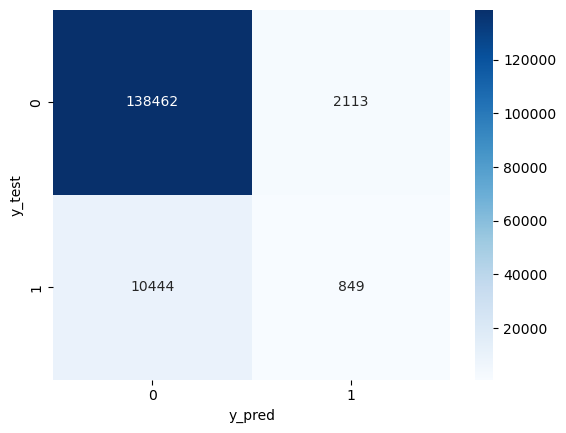

In [64]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
#tiap confussion matrix, pasti ytrue/y_test adalah sumbu y, 
plt.xlabel('y_pred'); plt.ylabel('y_test')
plt.show()

diagonal hasil yg benar, 0&0, 1&1.(pojok kanan atas ke kiri bawah)
- salah memprediksi/ miss-classified utk 0 tpp prediksi sbg 1 sbyk 2113
- missclassified 1 tp prediksi 0 sebanyak 10444

tentunya kita ingin hasil diaagonal yg salah hasilnya nol, artinya kalo nol berarti model sempurna untuk memprediksi bad loan / good loan
- sebenarnya kalo dalam kasus kredit-risk model, target class biasanya imbalance class/problem - missleading, maka dari itu utk mengukur matrixnya kita tidak bisa menggunakan accuraccy score karena....

In [65]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

## ROC- AUC , Treshold, Model Interpretation & Decision Default
ROC-AUC -> matrix dapat mengukur secara benar utk kasus imbalance
- threshold
- confusion matrix => berdasarkan threshold yg berbeda/ base threshold yg kita miliki 
- roc-auc -> matrix yg tidak bias seperti accuraccy score(utk kasus imbalance)
- model interpretation -> dari logistic regression

### Modeling II

In [66]:
# sebelumnya memprediksi dengan metode ini
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
# karena kita ingin memfosukuskan utk memprediksi probability
# mendapat 2 nilai,  row1/kiri/pertama=prediksi utk kelas 0(77% kemungkinan berhasil bayar,,dst), 
# row2= persentasi kemungkinan gagal bayar
# karena dalam kasus ini kita fokus ke gagal bayar, maka kita akan mengambil kolumn yg k2/ sebelah kanan
model.predict_proba(X_test)

array([[0.77455635, 0.22544365],
       [0.97517167, 0.02482833],
       [0.98958815, 0.01041185],
       ...,
       [0.99114442, 0.00885558],
       [0.9349968 , 0.0650032 ],
       [0.96294712, 0.03705288]])

In [68]:
# ambil semua row, dan column ke2
#model.predict_proba(X_test)[:,1]

In [69]:
# kita bisa ubah tresholdnya
# ketika > 0.5, maka akan set menjadi 1. sudah default di scikitlearn, ketika menggunakan model.predict 
# , treshold sudah diset 0.5. jika 0.22544365 sudah pasti nol/gagal bayar
# tapi karena kasus imbalance, yg prediksinya kebanyakan nol, pasti akan banyak nilai prob yg jatuh disekitar nol
# maka tidak bisa di set menjadi 0.5
y_pred = model.predict_proba(X_test)[:,1]
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

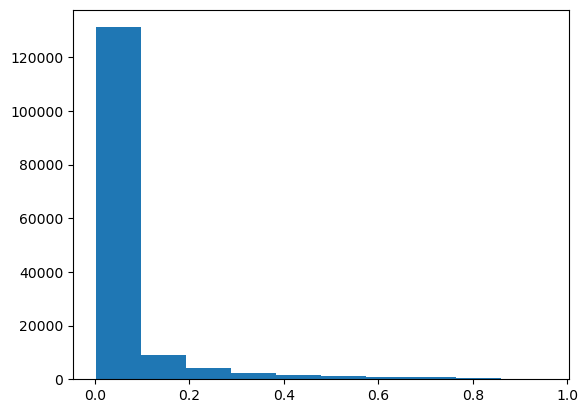

In [70]:
# banyak nilai prob yg jatuh di 0 - 0.1
plt.hist(y_pred);

mencari best threshold

In [71]:
# maka tidak bisa diset 0.5, harus di set di antara 0 atau 0.1
# caranya harus cari Best Treshold
# harus cari true positive rate
# dan false positive rate

from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [72]:
# mencari best treshold dengan metode youden j-statisic

j = tpr - fpr
# ambil nilai tertinggi, ingin ambil tpr sepaling tinggi2nya dan fpr dari yg serendah2nya
# dicari selisihnya,,, ix hanya mengambil index
ix = np.argmax(j)
best_thresh = threshold[ix]
best_thresh

0.06645170282804952

In [73]:
# kita ingin memprediksinya lagi
y_pred = model.predict_proba(X_test)[:,1]
y_pred = (y_pred > 0.06).astype(int)

- jika kita memprediksi suatu loan diatas 0,06 / 6% kemungnkinan besar loan akan gagal bayar
- jika kita memprediksi dibawah 0,06 maka kemungkinan loan akan berhasil bayar

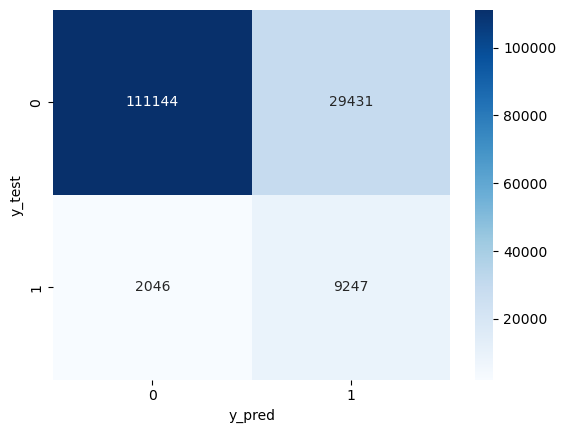

In [74]:
# konfusion matrix saat kita mengganti threshold yg tadi 50% menjadi 6%
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
#tiap confussion matrix, pasti ytrue/y_test adalah sumbu y, 
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

karena fokusnya ke 1/ yg gagal bayaar. maka lihatnya ke maatrix pojok kanan bawah, yakni yg ypred dan ytest = 1.
karena kita berhati2 dan ssecara akurat memprediksi loan yg akan gagal bayar. 
- jadi loan yg berhasil bayar ga di interpretasi, 

kesimpulan: kita berhasil meningkatkan dari 849 menjadi 9247 . peningkatan yg sangat tinggi, jadi kita berhasil menambah 9000 load data secara akurat, sehingga kita bisa mencegah kerugian dari 9000loan tsb.
- misal tiap 1 loan meminjam 1jt, dikali 9k sudah berapa?,
- jadi, kita bener2 ada risk menagement disini
<br></br>
- tapi kita gagal memprediksi yg 0 sebanyak 20kan, meskipun berpeluang utk kehilangan duit pembayaran loan, tapi kita berhasil mencegah resiko dari yg gagal bayaar.
- dalam dunia nyata, harus ditimbang lagi sseberapa banyak duit compapny yg hilang dari yg gagal bayar atau dari yang kehilangan peluang bayar, 
- misal cth diatas kita kehilangan 20k, tiap orang pinjam 1jt dan utk tiap orang tsb kita untung 100k, maka lebih banyak keuntungan yg mana? lebih banyak yg predict tsb atau lebih banyak keuntungan ketika kita tidak mengambil reisko

### Model Interpretation

In [75]:
model.coef_
#beta1,beta2,...beta5

array([[ 0.01726954, -0.03155795, -0.00103472,  0.04583942,  0.23472991,
        -0.15284456]])

In [77]:
X_train.head()
#x1,x2,... bisa diindikasikan nilai tiap kolom/sel
#x1=36,x2=4,x3=342.0,...

term  emp_length  mnth_since_earliest_cr_line  mnth_since_issue_d  \
147577    36           4                        342.0                72.0   
505776    36          10                        257.0                82.0   
412425    36           0                        285.0                67.0   
618730    36           5                        212.0                76.0   
111143    36           6                        133.0                71.0   

        mnth_since_last_pymnt_d  mnth_since_last_credit_pull_d  
147577                     62.0                           62.0  
505776                     67.0                           63.0  
412425                     62.0                           62.0  
618730                     62.0                           62.0  
111143                     62.0                           62.0

In [80]:
# model intercept -> jika kita tidak mengetahui apapun informasi dari loan(term, emo_length,..)maka keungkinan 
# besar prediksi cenderung berhasil bayar
model.intercept_

array([-12.00744093])

In [78]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

term  emp_length  mnth_since_earliest_cr_line  mnth_since_issue_d  \
0  0.01727   -0.031558                    -0.001035            0.045839   

   mnth_since_last_pymnt_d  mnth_since_last_credit_pull_d  
0                  0.23473                      -0.152845

- karena term nilai positif, maka semakin tinggi jangka waktu melunasi hutang, semakin besar peluang untuk gagal bayar
- emp_length: ketika emp length semakin tinggi maka kemungkinan gagal bayar semakin rendah
- mnth_since_earliest_cr_line : jika umur dari redit line sudah tua, maka kemungkinan gagal bayar semakin rendah
- mnth_since_issue_d: bernilai posiif, jika duit yg dicairkan sudah lama, maka semakin tinggi peluang untuk gagal bayar
- mnth_since_last_pymnt_d : jika bulan pembayarn terakhr sudah sangat lama, kemungkinan gagal bayar utk ciciilan selanjutnya-habis akan tinggi
- mnth_since_last_credit_pull_d : - . susah diinterpretasikan